In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data\ASA All PGA Raw Data - Tourn Level.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [4]:
column_index = [1, 5, 6, 7, 8, 9, 10, 20, 21, 22, 23, 24, 26, 28]
df2 = df.drop(df.columns[column_index], axis = 1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   player id            36864 non-null  int64  
 2   hole_par             36864 non-null  int64  
 3   strokes              36864 non-null  int64  
 4   n_rounds             36864 non-null  int64  
 5   made_cut             36864 non-null  int64  
 6   pos                  21317 non-null  float64
 7   finish_DKP           36864 non-null  int64  
 8   finish_FDP           36864 non-null  int64  
 9   finish_SDP           36864 non-null  int64  
 10  total_DKP            36864 non-null  float64
 11  total_FDP            36864 non-null  float64
 12  total_SDP            36864 non-null  int64  
 13  course               36864 non-null  object 
 14  purse                36864 non-null  float64
 15  no_cut               36864 non-null 

In [5]:
df2.isna().any()

Player_initial_last    False
player id              False
hole_par               False
strokes                False
n_rounds               False
made_cut               False
pos                     True
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
course                 False
purse                  False
no_cut                 False
Finish                  True
sg_putt                 True
sg_arg                  True
sg_app                  True
sg_ott                  True
sg_t2g                  True
sg_total                True
dtype: bool

In [6]:
df2.replace('Nan', np.nan, inplace = True)
df2.dropna(axis = 0, inplace = True)

In [7]:
df2.isna().any()

Player_initial_last    False
player id              False
hole_par               False
strokes                False
n_rounds               False
made_cut               False
pos                    False
finish_DKP             False
finish_FDP             False
finish_SDP             False
total_DKP              False
total_FDP              False
total_SDP              False
course                 False
purse                  False
no_cut                 False
Finish                 False
sg_putt                False
sg_arg                 False
sg_app                 False
sg_ott                 False
sg_t2g                 False
sg_total               False
dtype: bool

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 36751
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  16291 non-null  object 
 1   player id            16291 non-null  int64  
 2   hole_par             16291 non-null  int64  
 3   strokes              16291 non-null  int64  
 4   n_rounds             16291 non-null  int64  
 5   made_cut             16291 non-null  int64  
 6   pos                  16291 non-null  float64
 7   finish_DKP           16291 non-null  int64  
 8   finish_FDP           16291 non-null  int64  
 9   finish_SDP           16291 non-null  int64  
 10  total_DKP            16291 non-null  float64
 11  total_FDP            16291 non-null  float64
 12  total_SDP            16291 non-null  int64  
 13  course               16291 non-null  object 
 14  purse                16291 non-null  float64
 15  no_cut               16291 non-null  int6

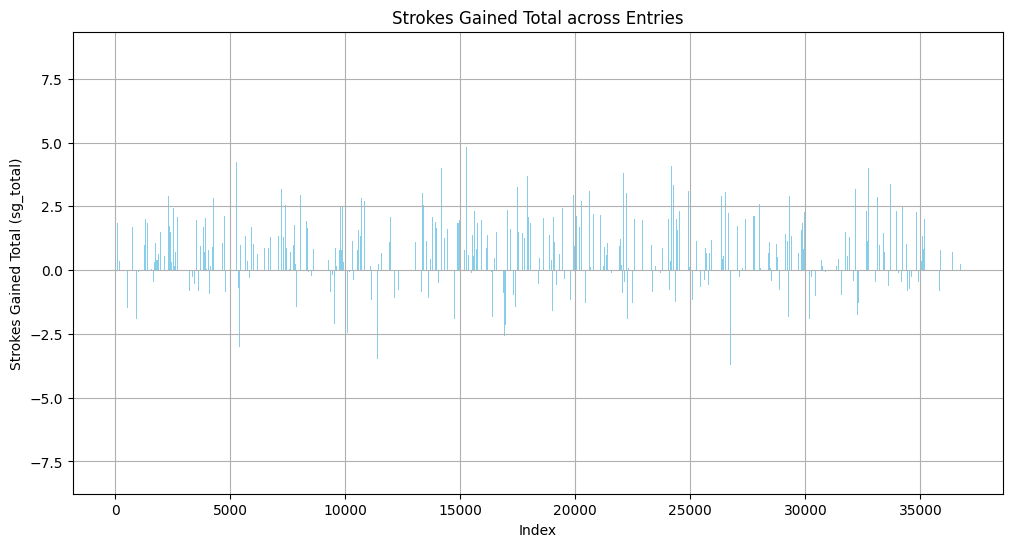

In [13]:
plt.figure(figsize=(12, 6))
plt.bar(df2.index, df2['sg_total'], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Strokes Gained Total (sg_total)')
plt.title('Strokes Gained Total across Entries')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

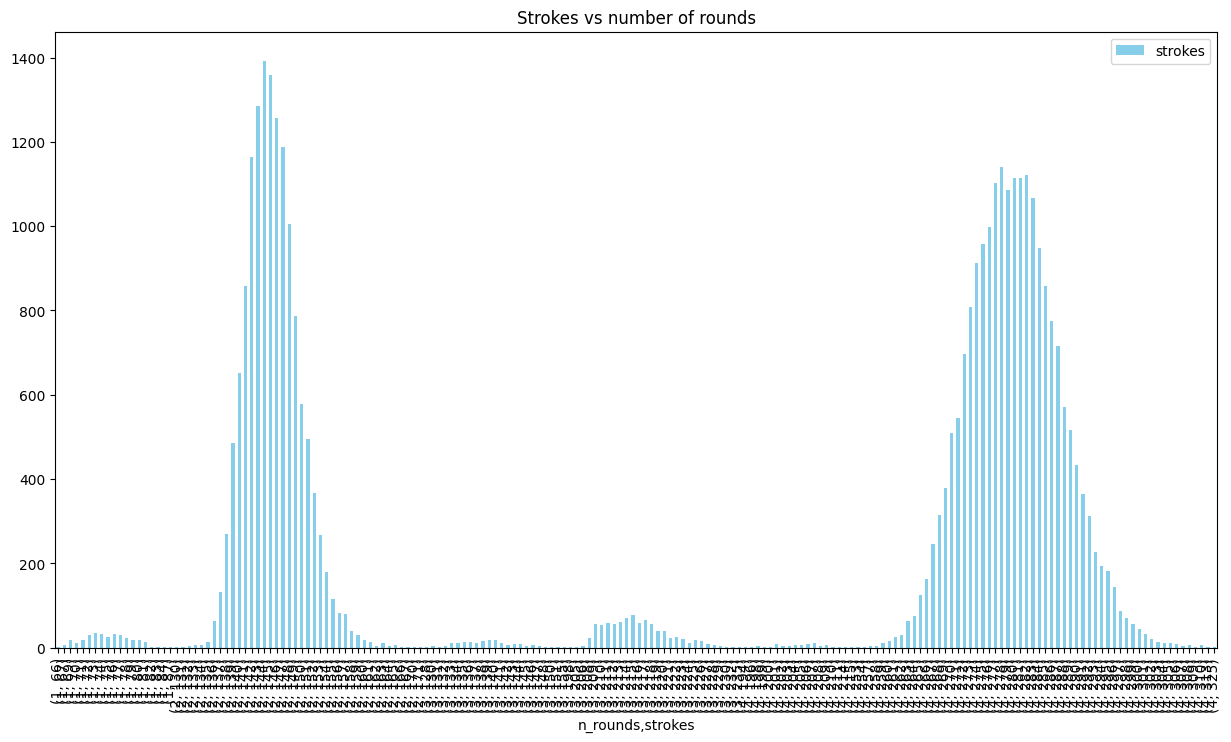

In [16]:
plt.figure(figsize=(15,8))
df.groupby(['n_rounds', 'strokes']).strokes.count().plot(kind = 'bar',color = 'skyblue')
plt.title('Strokes vs number of rounds')
plt.legend()
plt.show()